In [1]:
import xarray as xr
import glob
import numpy as np
import matplotlib.pyplot as plt

import cluster_SSL

import seaborn as sns

In [3]:
sns.set_theme(style="whitegrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

In [4]:
import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

## List files to extract SSL
The files used in Tromsøflaket analysis are 21st to 29th.

In [8]:
flist = glob.glob('F:GLIDER2018/Echosounder/Echosounder/nc_files/GLIDER_SB_2018_v5-Phase0-D2018062*-?.nc')
flist = flist[6:]
flist

['F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T080104-0.nc',
 'F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T080656-1.nc',
 'F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T081247-2.nc',
 'F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T083109-0.nc',
 'F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T083701-1.nc',
 'F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T084252-2.nc',
 'F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T090109-0.nc',
 'F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T090701-1.nc',
 'F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T091252-2.nc',
 'F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T103109-0.nc',
 'F:GLIDER

# Lets work through the list...

In [23]:
nfile=150

In [43]:
# manually loop from here to continue to next file
nfile += 1
print(flist[nfile])

F:GLIDER2018/Echosounder/Echosounder/nc_files\GLIDER_SB_2018_v5-Phase0-D20180625-T093107-0.nc


C:\Users\mbd\anaconda3\envs\phd-env\lib\site-packages\xarray\core\alignment.py:307: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
C:\Users\mbd\anaconda3\envs\phd-env\lib\site-packages\xarray\core\alignment.py:307: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)


window depth=528
window time=4


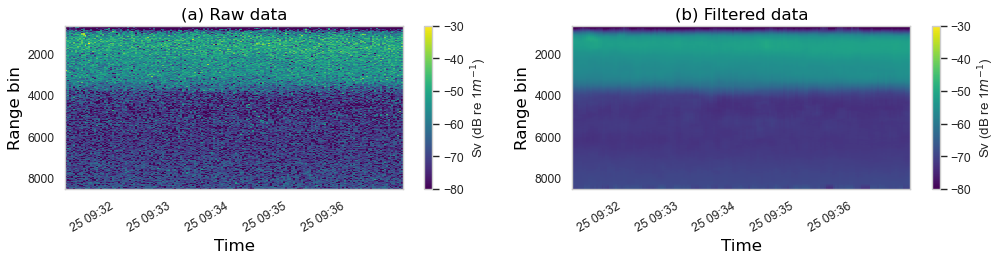

In [45]:
ds = cluster_SSL.get_backscatter(flist[nfile], maxSNR=50)
ds_s = cluster_SSL.smooth_backscatter(ds)

Wall time: 5.64 s


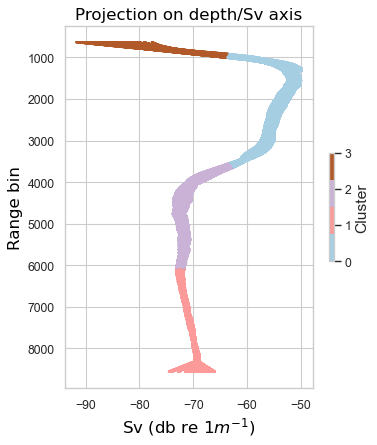

In [46]:
%%time
# select your amount of clusters, trial and error
# Simple strong SSL seem to need less clusters
nclusters = 4
res = cluster_SSL.cluster_backscatter(ds_s, factor=2, n_clusters=nclusters)

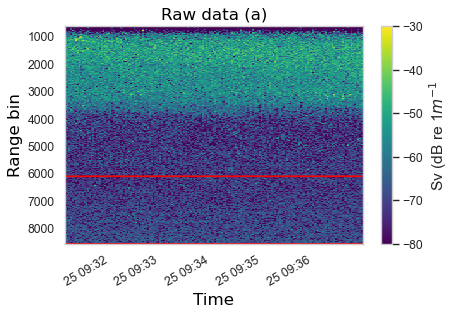

In [47]:
top_layer, bottom_layer = cluster_SSL.select_cluster(res,cluster_id=1)

### If saving entrained air

In [1163]:
# Only run is saving a entrained_air line!
entrained_air = bottom_layer

In [1151]:
# if no layer but want to save entraine air
bottom_layer.data = np.zeros(np.shape(bottom_layer.data))*np.nan
top_layer.data = np.zeros(np.shape(top_layer.data))*np.nan

Cluster amount varies from 4-9 approximately. Thinner and weaker SSL require more adjustments and generally more clusters, where are stronger (higher SNR) and large SSL require less clusters

## Write to file 
Select correct cluster amount and id is 

In [1152]:
cluster_SSL.write_ssl(flist[nfile], ds, top_layer, bottom_layer, nclusters, entrained_air = entrained_air)

In [1153]:
nfile/len(flist)

0.9663865546218487

In [11]:
top_layer

<xarray.DataArray 'range_bin' (ping_time: 96)>
array([1977., 1997., 2056., 2139., 2139., 2078., 2106., 2095., 2087.,
       2041., 2063., 2015., 1988., 2043., 1989., 2012., 2044., 1973.,
       1965., 2017., 2020., 1969., 1795., 1724., 1691., 1680., 1761.,
       1910., 1764., 1709., 1868., 1848., 1936., 1903., 1844., 1897.,
       1901., 1754., 1749., 1859., 1927., 2012., 1964., 1919., 2039.,
       2080., 2053., 2078., 2192., 2175., 2242., 2413., 2377., 2328.,
       2300., 2359., 2449., 2427., 2353., 2251., 2206., 2122., 2241.,
       2229., 2062., 2235., 2171., 2056., 2078., 2076., 2034., 2041.,
       2034., 2143., 2090., 1947., 2001., 2028., 2021., 2195., 2188.,
       2102., 1818., 1806., 1850., 1844., 1864., 1744., 1670., 1650.,
       1681., 1680., 1706., 1726., 1810., 1817.])
Coordinates:
    frequency  float64 3.33e+05
  * ping_time  (ping_time) datetime64[ns] 2018-06-25T05:12:54.284000256 ... 2...

In [755]:
nfile

293